In [15]:
import numpy as np
import numpy.linalg as npl

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

In [20]:
N = 20
M = 2
seed = np.random.RandomState(seed=2)
X = seed.randint(0, 20, N*M).astype(float)
X = X.reshape((N, M))
X -= np.mean(X) # center

D = euclidean_distances(X)

# add noise
# noise = np.random.rand(N, N)
# noise = noise + noise.T
# noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
# D += noise

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(D).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1, n_init=1)
X_ = nmds.fit_transform(D, init=pos)
# X_ = nmds.fit_transform(D) # does not preserve if not init to pos? then what use bruh

x1=X
x2=X_

# rescale
pos *= np.sqrt(np.sum(X**2))/np.sqrt(np.sum(pos**2))
X_ *= np.sqrt(np.sum(X**2))/np.sqrt(np.sum(X_**2))

# rotate
clf = PCA(n_components=2)
X = clf.fit_transform(X)
pos = clf.fit_transform(pos)
X_ = clf.fit_transform(X_)
# pos = clf.transform(pos)
# X_ = clf.transform(X_)

D_ = euclidean_distances(X_)

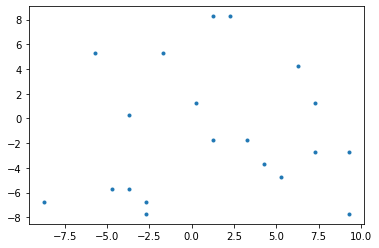

In [25]:
plt.plot(x1[:,0], x1[:,1], 'C0.')

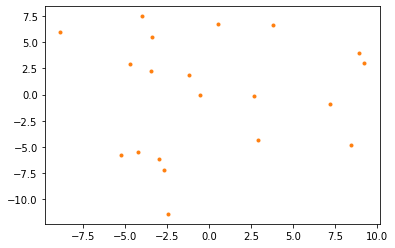

In [26]:
plt.plot(x2[:,0], x2[:,1], 'C1.')

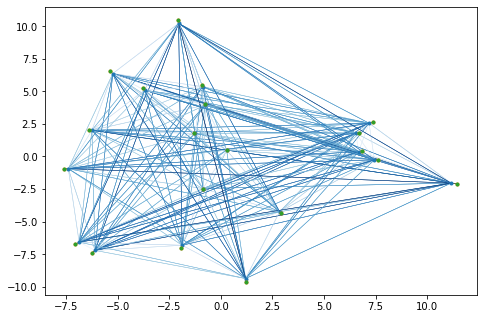

In [17]:
ax = plt.axes([0., 0., 1., 1.])

# points
plt.plot(X[:,0], X[:,1], 'C0.')
plt.plot(X_[:,0], X_[:,1], 'C1.')
plt.plot(pos[:,0], pos[:,1], 'C2.')

# edges
vertices = [[X[i,:], X[j,:]] for i in range(N) for j in range(N)]
vals = np.abs(D)
edges = LineCollection(vertices, zorder=0, cmap='Blues', norm=plt.Normalize(0, np.max(vals)))
edges.set_array(D.flatten())
edges.set_linewidth(np.full(len(vertices), 0.5))
ax.add_collection(edges)

# embeddings
em = [[X[i,:], X_[i,:]] for i in range(N)]
lc = LineCollection(em, zorder=0, cmap='Oranges', norm=plt.Normalize(0,1))
lc.set_array(np.ones(N))
lc.set_linewidth(np.full(N, 0.5))
ax.add_collection(lc)

og = [[X[i,:], pos[i,:]] for i in range(N)]
lc = LineCollection(og, zorder=0, cmap='Greens', norm=plt.Normalize(0,1))
lc.set_array(np.ones(N))
lc.set_linewidth(np.full(N, 0.5))
ax.add_collection(lc)

In [13]:
# is ordering preserved
imap = {} # map array index to matrix index
i = 0
d = np.array([])
d_ = np.array([])
for r in range(N):
    for c in range(r+1, N):
        imap[i] = (r, c)
        d = np.append(d, D[r,c])
        d_ = np.append(d_, D_[r, c])
        i += 1

idx = np.argsort(d)
d = d[idx]
S = [imap[idx[i-1]] + imap[idx[i+1]] for i in range(1,len(idx)-1)]

before = np.zeros(len(S))
after = np.zeros(len(S))
for s in range(len(S)):
    i,j,k,l = S[s]
    before[s] = D[i,j] <= D[k,l]
    after[s] = D_[i,j] <= D_[k,l]

# fraction of orderings preserved
preserved = (len(S) - np.count_nonzero(before-after))/len(S)
print(preserved)
print(before)
print(after)

1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


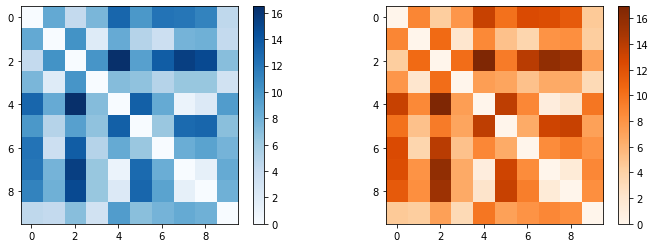

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();
plt.subplot(122)
plt.imshow(D_, zorder=2, cmap='Oranges', interpolation='nearest')
plt.colorbar();